In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("Startup Failures.xlsx")

In [5]:
print("Shape:", df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum())

Shape: (815, 7)
         Name                                          Sector  Operation data  \
0   99dresses                                    Retail Trade   3 (2010-2013)   
1     Ahalife                                    Retail Trade   7 (2010-2017)   
2   Airy Labs                                     Information   2 (2010-2012)   
3  AllRomance                                    Retail Trade  10 (2006-2016)   
4      Ampush  Professional Scientific and Technical Services  13 (2010-2023)   

   Years of Operation  Start year  end year   Lifespan  
0                   3        2010       2013         3  
1                   7        2010       2017         7  
2                   2        2010       2012         2  
3                  10        2006       2016        10  
4                  13        2010       2023        13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [7]:
df['sector'] = df['sector'].fillna('Unknown')
df['end_year'] = df['end_year'].fillna(0).astype(int)

Top Sectors by Failed Startups

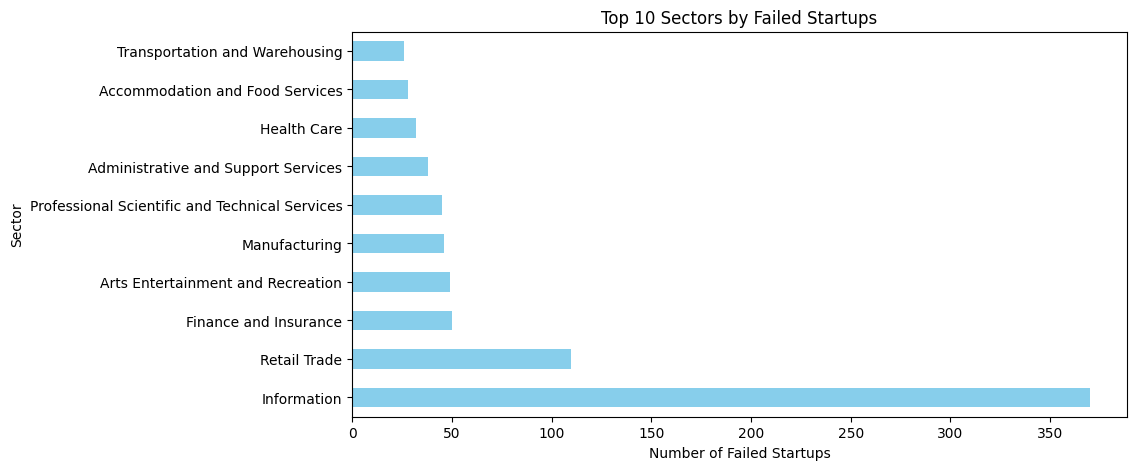

In [8]:
#Top Sectors by Failed Startups

plt.figure(figsize = (10,5))
df['sector'].value_counts().head(10).plot(kind='barh', color = 'skyblue')
plt.title("Top 10 Sectors by Failed Startups")
plt.xlabel("Number of Failed Startups")
plt.ylabel("Sector")
plt.show()


Startup lifespan distribution

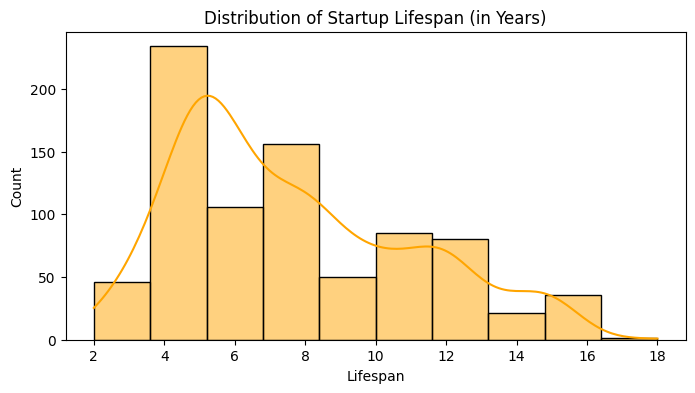

In [9]:
# Startup lifespan distribution

plt.figure(figsize = (8,4))
sns.histplot(df['lifespan'], bins =10, kde = True, color = 'orange')
plt.title("Distribution of Startup Lifespan (in Years)")
plt.xlabel("Lifespan")
plt.show()


Startup lifespan distribution

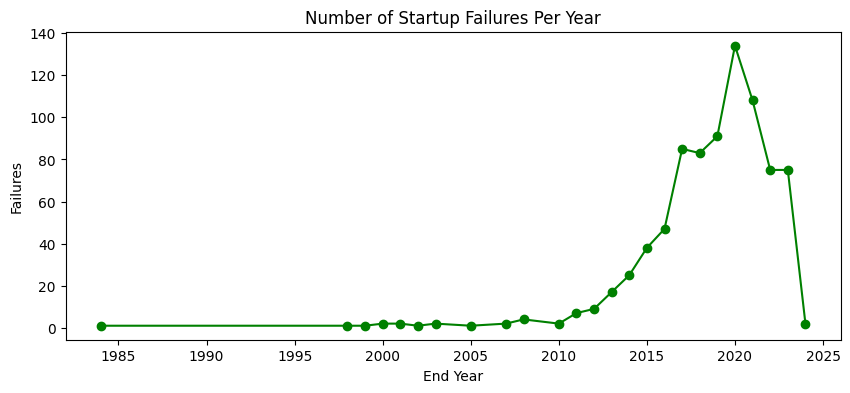

In [ ]:
# 7. Startup lifespan distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['lifespan'], bins=10, kde=True, color='orange')
plt.title("Distribution of Startup Lifespan (in Years)")
plt.xlabel("Lifespan")
plt.show()


Failures over end year

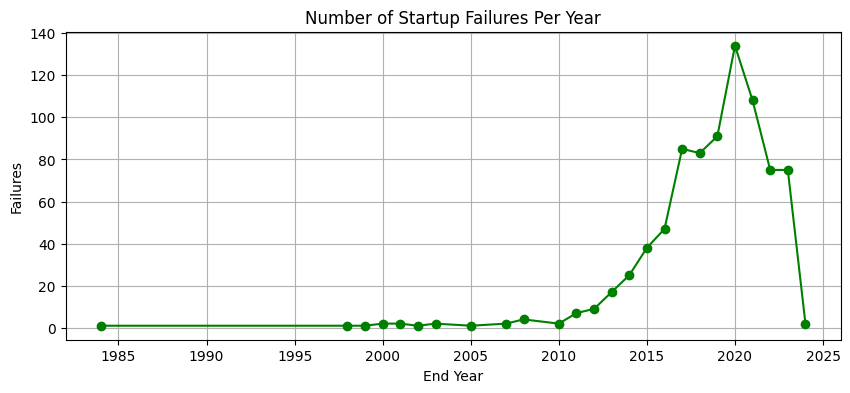

In [12]:
# 8. Failures over end year
plt.figure(figsize=(10, 4))
df['end_year'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title("Number of Startup Failures Per Year")
plt.xlabel("End Year")
plt.ylabel("Failures")
plt.grid(True)
plt.show()

Startup Survival Trend Analysis


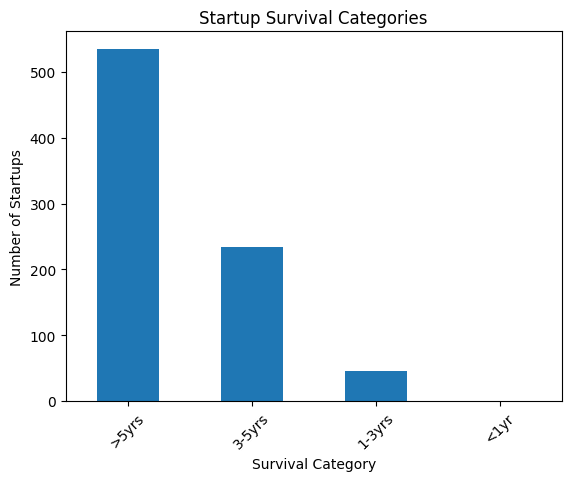

In [22]:
df['survival_category'] = pd.cut(df['lifespan'], bins =[0,1,3,5,100], labels = ['<1yr', '1-3yrs', '3-5yrs', '>5yrs'])
df['survival_category'].value_counts().plot(kind='bar')
plt.ylabel("Number of Startups")
plt.title("Startup Survival Categories")
plt.xlabel("Survival Category")
plt.xticks(rotation = 45)
plt.show()

Stacked Bar: Sector vs Failure Year


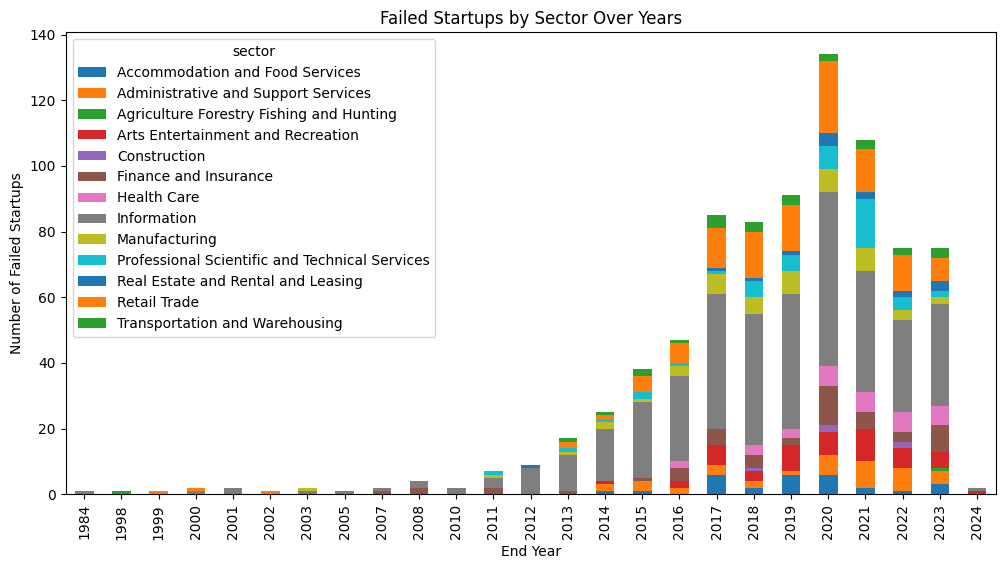

In [ ]:
pivot = df.pivot_table(index='end_year', columns='sector', values='name', aggfunc='count').fillna(0)
pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel("End Year")
plt.ylabel("Number of Failed Startups")
plt.title("Failed Startups by Sector Over Years")
plt.show()


Startup Failure Time (Start to End Delay)

-Show which sectors failed faster (low lifespan)


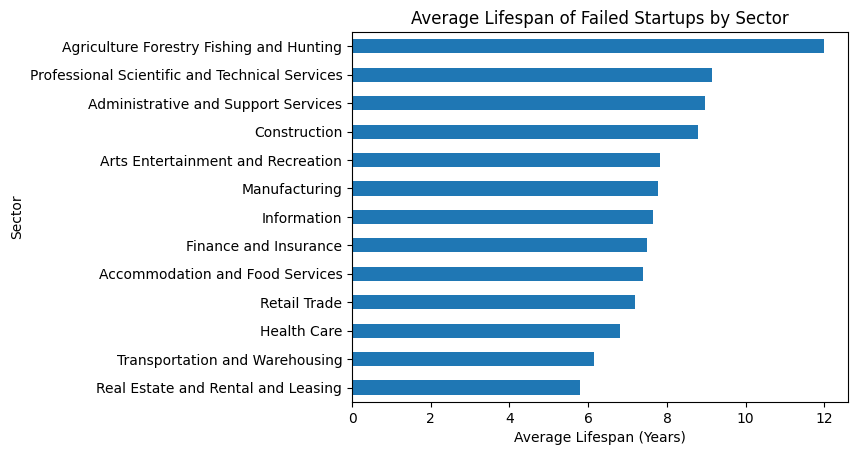

In [33]:
df.groupby('sector')['lifespan'].mean().sort_values().plot(kind='barh')
plt.title("Average Lifespan of Failed Startups by Sector")
plt.xlabel("Average Lifespan (Years)")
plt.ylabel("Sector")
plt.show()